# Imports

In [1]:
import os

import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torchaudio

# EDA

## Overview

In [2]:
data_dir = "../../data"

In [3]:
meta = pd.read_csv(os.path.join(data_dir, "meta.csv"), sep='\t')
meta.sample(10)

,filename,scene_label,identifier,source_label
8591,audio/shopping_mall-lisbon-1137-42344-a.wav,shopping_mall,lisbon-1137,a
10801,audio/street_pedestrian-barcelona-143-4332-b.wav,street_pedestrian,barcelona-143,b
16151,audio/street_pedestrian-lyon-1162-45691-s1.wav,street_pedestrian,lyon-1162,s1
5816,audio/park-prague-1092-43369-a.wav,park,prague-1092,a
7784,audio/public_square-stockholm-120-3554-a.wav,public_square,stockholm-120,a
22485,audio/tram-london-278-8454-a.wav,tram,london-278,a
9993,audio/street_pedestrian-prague-1085-42780-a.wav,street_pedestrian,prague-1085,a
7955,audio/public_square-milan-1014-41006-a.wav,public_square,milan-1014,a
15730,audio/public_square-paris-251-7515-s6.wav,public_square,paris-251,s6
520,audio/airport-helsinki-4-208-a.wav,airport,helsinki-4,a


In [4]:
print(f"Number of audios: {len(meta.filename.unique())}")
print(f"Number of scenes: {len(meta.scene_label.unique())}")
print(f"Number of identifiers: {len(meta.identifier.unique())}")
print(f"Number of sources: {len(meta.source_label.unique())}")

Number of audios: 23035
Number of scenes: 10
Number of identifiers: 514
Number of sources: 9


<AxesSubplot:xlabel='scene_label', ylabel='count'>

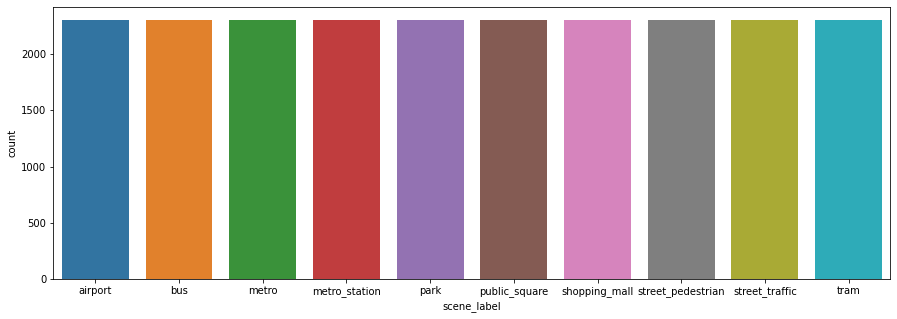

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(x="scene_label", data=meta)

<AxesSubplot:xlabel='source_label', ylabel='count'>

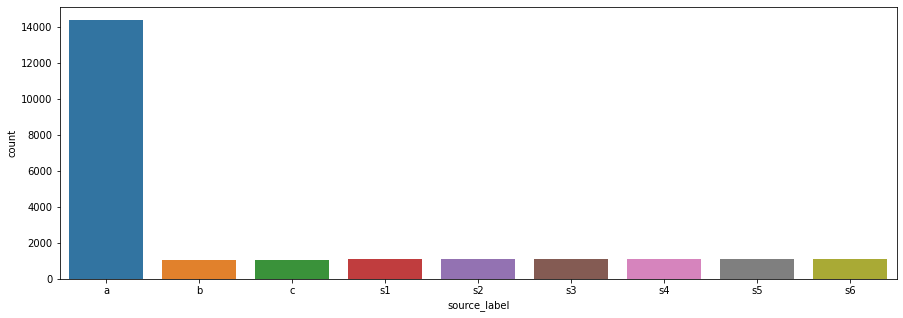

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(x="source_label", data=meta)

## Audio

Shape of waveform: torch.Size([1, 441000])
Sample rate of waveform: 44100 f/s
Duration: 10.0 s


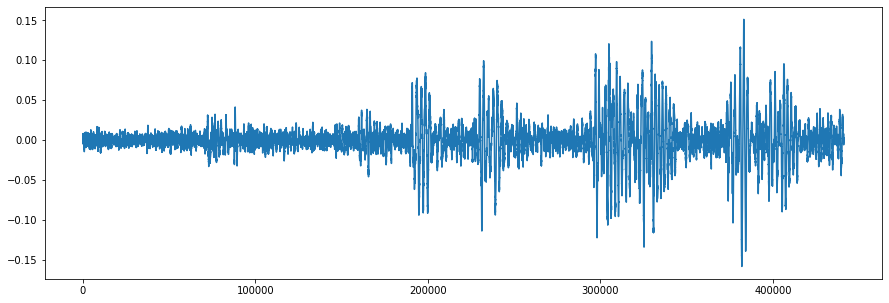

In [7]:
audio_dir = os.path.join(data_dir, "audio")
audio_filename = os.path.join(audio_dir, "tram-vienna-200-6015-a.wav")
waveform, sample_rate = torchaudio.load(audio_filename)

print(f"Shape of waveform: {waveform.size()}")
print(f"Sample rate of waveform: {sample_rate} f/s")
print(f"Duration: {waveform.size()[1] / sample_rate} s")

plt.figure(figsize=(15,5))
plt.plot(waveform.t().numpy())
ipd.Audio(audio_filename)